In [1]:
import jax.numpy as jnp

import make_df

import matplotlib.pyplot as plt

In [2]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [3]:
# sparsification
sparse = True
mode = "optim"
subset_size = 0.02
sparse_dict = {0.1: "log_sparse_0_1", 0.02: "log_sparse_0_02", 0.3: "log_sparse_0_3", 0.005: "log_sparse_0_005"}

if sparse:
    # directory where to save stuff
    in_dir = f"./sparse/{mode}/{sparse_dict[subset_size]}"

    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800]


# optimizer type
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [4]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [5]:
# data.head(5)

## Compare MSE for different optimizers

In [6]:
# colors = ["b", "r", "g", "cyan"]

# fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# for i, optimizer in enumerate(optimizers):
#     opt_data = data[data["opt"] == optimizer]
#     for c,f in zip(colors, opt_data["f"].unique()):
#         temp = opt_data[opt_data["f"] == f]
#         dvals = temp["d"]

#         # mean_mse = temp["mean_mse"]
#         median_mse = temp["median_mse"]
#         min_mse = temp["min_mse"]
#         max_mse = temp["max_mse"]
#         # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[i].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
#         ax[i].set_yscale("log")
#         ax[i].set_xscale("log")


#     ax[i].grid()
#     ax[i].legend()
#     ax[i].set_xlabel("#d-vals")
#     ax[i].set_title(optimizer)

# ax[0].set_ylabel("MSE")

## Compare percentage of True function in $1\sigma$ confidence interval for different optimizers

In [7]:
# colors = ["b", "r", "g", "cyan"]

# fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# for i, optimizer in enumerate(optimizers):
#     opt_data = data[data["opt"] == optimizer]
#     for c,f in zip(colors, opt_data["f"].unique()):
#         temp = opt_data[opt_data["f"] == f]
#         dvals = temp["d"]

#         mean_tic = temp["mean_tic"]
#         min_tic = temp["min_tic"]
#         max_tic = temp["max_tic"]
#         ax[i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


#     ax[i].grid()
#     ax[i].legend()
#     ax[i].set_xlabel("#d-vals")
#     ax[i].set_title(optimizer)
# ax[0].set_ylabel("% Y inside conf.-interval")

## Compare predicted error for different optimizers

In [8]:
# colors = ["b", "r", "g", "cyan"]

# fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# for i, optimizer in enumerate(optimizers):
#     opt_data = data[data["opt"] == optimizer]
#     for c,f in zip(colors, opt_data["f"].unique()):
#         temp = opt_data[opt_data["f"] == f]
#         dvals = temp["d"]

#         mean_tic = temp["median_maxerrs"]
#         min_tic = temp["min_maxerrs"]
#         max_tic = temp["max_maxerrs"]
#         ax[i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)
#         ax[i].set_yscale("log")
#         ax[i].set_xscale("log")


#     ax[i].grid()
#     ax[i].legend()
#     ax[i].set_xlabel("#d-vals")
#     ax[i].set_title(optimizer)
# ax[0].set_ylabel("predicted standard error")

## Comparison between different sparsifications

In [9]:
# colors = ["b", "r", "g", "cyan"]
# list_d_vals = [200, 400, 800, 1500, 2000, 3000]

# fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

# sparse_list = [[0.005, 0.02], [0.1, 0.3]]
# optimizers = ["SLSQP"]

# for i, elem in enumerate(sparse_list):
#     for j, sparse in enumerate(elem):
#         in_dir = f"./sparse/{mode}/{sparse_dict[sparse]}"
#         data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, True, sparse, fun, eval_grid)
#         opt_data = data[data["opt"] == optimizers[0]]
#         for c,f in zip(colors, opt_data["f"].unique()):
#             temp = opt_data[opt_data["f"] == f]
#             dvals = temp["d"]

#             # mean_mse = temp["mean_mse"]
#             median_mse = temp["median_mse"]
#             min_mse = temp["min_mse"]
#             max_mse = temp["max_mse"]
#             # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#             ax[i,j].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#             ax[i,j].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
#             ax[i,j].set_yscale("log")
#             ax[i,j].set_xscale("log")


#         ax[i,j].grid()
#         # ax[i,j].legend()
#         ax[i,j].set_title(sparse)

# ax[1,0].set_xlabel("#d-vals")
# ax[1,1].set_xlabel("#d-vals")
# ax[0,0].set_ylabel("MSE")
# ax[1,0].set_ylabel("MSE")
# fig.suptitle("MSE over training set size for different sparsification")
# handles, labels = ax[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncols=4)

## Comparse different sparsifications

In [10]:
mode = "even"
optimizers = ["SLSQP"]

sparse_list = [0.02, 0.1, 0.3]
# sparse_list = [0.005, 0.02, 0.1, 0.3]

list_f_vals = [1, 5, 20, 50]
list_d_vals = [200, 400, 800, 1500, 2000, 3000]

colors = ["b", "r", "g", "cyan"]

In [11]:
def plotting_data_sparse():
    medians = []
    means = []
    stds = []
    mins = []
    maxs = []

    for sparse in sparse_list:
        in_dir = f"./sparse/{mode}/{sparse_dict[sparse]}"
        data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, True, sparse, fun, eval_grid)
        opt_data = data[data["opt"] == optimizers[0]]

        median_mse = []
        mean_mse = []
        std_mse = []
        min_mse = []
        max_mse = []

        for f in opt_data["f"].unique():
            temp = opt_data[opt_data["f"] == f]

            median_mse.append(list(temp["median_mse"]))
            mean_mse.append(list(temp["mean_mse"]))
            std_mse.append(list(temp["std_mse"]))
            min_mse.append(list(temp["min_mse"]))
            max_mse.append(list(temp["max_mse"]))

        medians.append(median_mse)
        means.append(mean_mse)
        stds.append(std_mse)
        mins.append(min_mse)
        maxs.append(max_mse)

    return jnp.array(medians), jnp.array(means), jnp.array(stds), jnp.array(mins), jnp.array(maxs)
    # shape (sparse_types, n_f, n_d)

def plotting_data_full():
    in_dir = f"./full/log_full"
    data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, False, sparse, fun, eval_grid)
    opt_data = data[data["opt"] == optimizers[0]]

    median_mse = []
    mean_mse = []
    std_mse = []
    min_mse = []
    max_mse = []

    for f in opt_data["f"].unique():
        temp = opt_data[opt_data["f"] == f]

        median_mse.append(list(temp["median_mse"]))
        mean_mse.append(list(temp["mean_mse"]))
        std_mse.append(list(temp["std_mse"]))
        min_mse.append(list(temp["min_mse"]))
        max_mse.append(list(temp["max_mse"]))

    return jnp.array(median_mse), jnp.array(mean_mse), jnp.array(std_mse), jnp.array(min_mse), jnp.array(max_mse)

In [12]:
median_mse_sparse, mean_mse_sparse, std_mse_sparse, min_mse_sparse, max_mse_sparse = plotting_data_sparse()
median_mse_full, mean_mse_full, std_mse_full, min_mse_full, max_mse_full = plotting_data_full()

Text(0, 0.5, 'MSE')

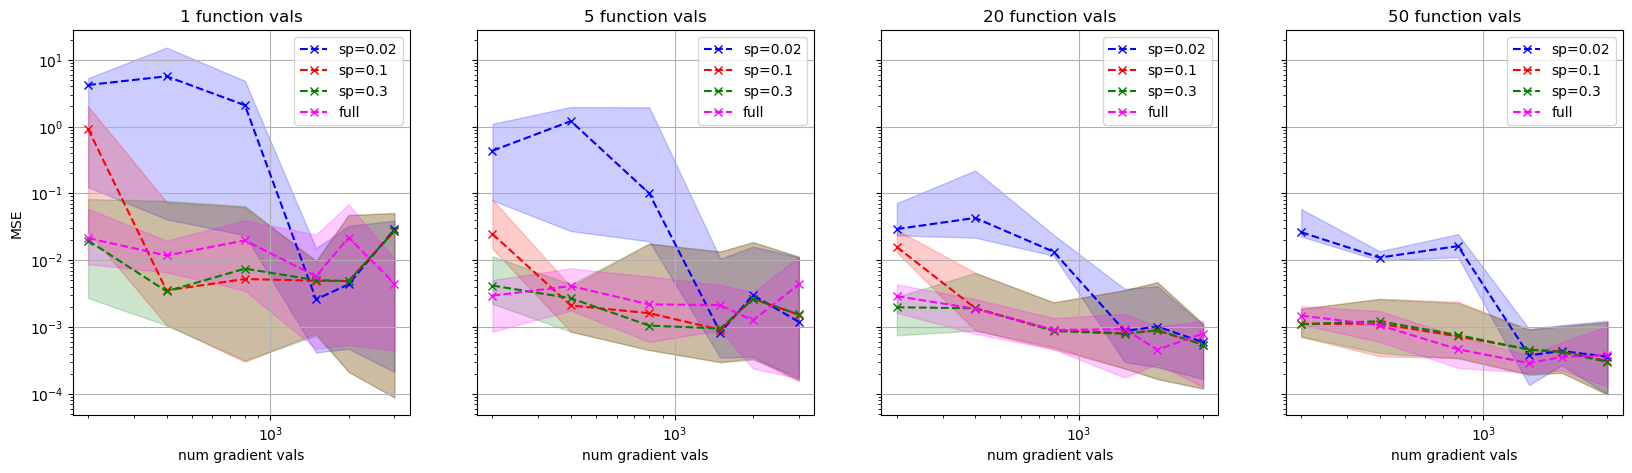

In [13]:
fig, ax = plt.subplots(1, len(list_f_vals), figsize=(5*len(list_f_vals),5), sharey=True)

for i, f in enumerate(list_f_vals):
    for j,(c, s) in enumerate(zip(colors, sparse_list)):
        # mean_mse = mean_mse_sparse[j,i]
        median_mse = median_mse_sparse[j,i]
        # std_mse = std_mse_sparse[j,i]
        min_mse = min_mse_sparse[j,i]
        max_mse = max_mse_sparse[j,i]

        ax[i].plot(list_d_vals, median_mse, color=c, ls="--", marker="x", label=f"sp={s}")
        ax[i].fill_between(list_d_vals, min_mse, max_mse, alpha=0.2, color=c)
    
    ax[i].plot(list_d_vals, mean_mse_full[i], color="magenta", ls="--", marker="x", label=f"full")
    ax[i].fill_between(list_d_vals, min_mse_full[i], max_mse_full[i], alpha=0.2, color="magenta")

    ax[i].set_yscale("log")
    ax[i].set_xscale("log")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(f"{f} function vals")
    ax[i].set_xlabel("num gradient vals")

ax[0].set_ylabel("$\Omega$")

Text(0, 0.5, 'MSE')

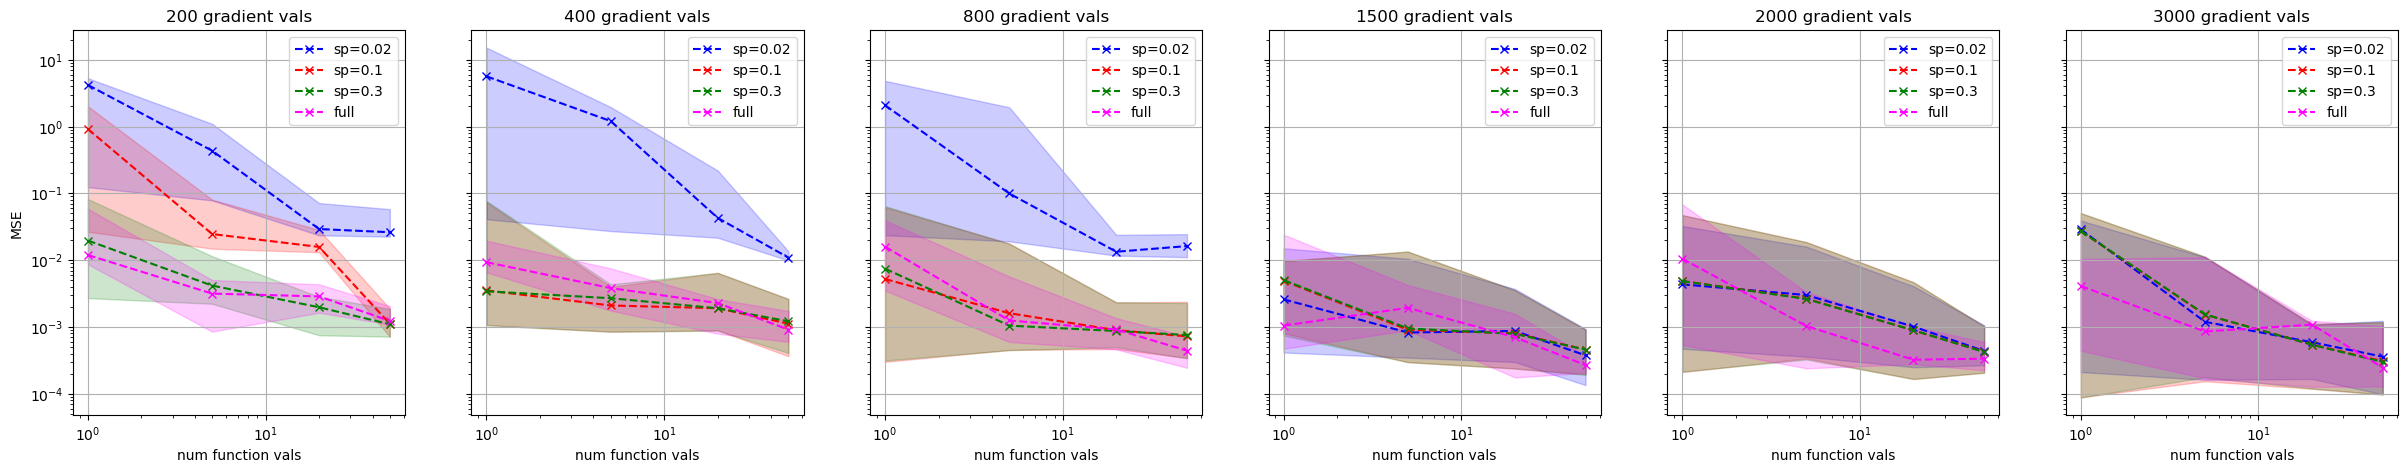

In [14]:
fig, ax = plt.subplots(1, len(list_d_vals), figsize=(5*len(list_d_vals),5), sharey=True)

for i, d in enumerate(list_d_vals):
    for j,(c, s) in enumerate(zip(colors, sparse_list)):
        median_mse = median_mse_sparse[j,:,i]
        min_mse = min_mse_sparse[j,:,i]
        max_mse = max_mse_sparse[j,:,i]

        ax[i].plot(list_f_vals, median_mse, color=c, ls="--", marker="x", label=f"sp={s}")
        ax[i].fill_between(list_f_vals, min_mse, max_mse, alpha=0.2, color=c)
        
    ax[i].plot(list_f_vals, median_mse_full[:,i], color="magenta", ls="--", marker="x", label=f"full")
    ax[i].fill_between(list_f_vals, min_mse_full[:,i], max_mse_full[:,i], alpha=0.2, color="magenta")
    
    ax[i].set_yscale("log")
    ax[i].set_xscale("log")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(f"{d} gradient vals")
    ax[i].set_xlabel("num function vals")

ax[0].set_ylabel("MSE")